<a href="https://colab.research.google.com/github/ReynaldiJ/portfolio/blob/main/Image_Classification_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reynaldi Joely-2540124356
Link Video: https://youtu.be/UmxHnON7i7k

2.a)

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as tfs
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('UTS_B.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
INPUT_DIR = '/content/Data B/dataset'
# Imagenet mean and standard (are calculated from all of images)
IMAGENET_MEAN = np.array([0.485, 0.456, 0.406])
IMAGENET_STD = np.array([0.229, 0.224, 0.225])
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
BATCH_SIZE = 4

In [ ]:
data_tfs = {
    'train': tfs.Compose([
        tfs.Resize(300),
        tfs.RandomCrop(244),
        tfs.RandomHorizontalFlip(),
        tfs.ToTensor(),
        tfs.Normalize(IMAGENET_MEAN, IMAGENET_STD)
    ]),
    'val': tfs.Compose([
        tfs.Resize(256),
        tfs.CenterCrop(244),
        tfs.ToTensor(),
        tfs.Normalize(IMAGENET_MEAN, IMAGENET_STD)
    ]),
}

dataset = {ds: torchvision.datasets.ImageFolder(
    root=os.path.join(INPUT_DIR, ds),
    transform=data_tfs[ds]
) for ds in ['train', 'val']}

dataset_size = {ds: len(dataset[ds]) for ds in ['train', 'val']}
dataset_classes = dataset['train'].classes
print('classes:', dataset_classes, '\nsize', dataset_size)

dataloader = {
    'train': torch.utils.data.DataLoader(
        dataset=dataset['train'], batch_size=BATCH_SIZE, shuffle=True, num_workers=2
    ),
    'val': torch.utils.data.DataLoader(
        dataset=dataset['val'], batch_size=BATCH_SIZE, shuffle=False, num_workers=2
    ),
}

classes: ['Anemone Dahlias', 'Ball Dahlias'] 
size {'train': 168, 'val': 40}


In [ ]:
def get_batches(dataloader, num_of_batches=3):
    assert(num_of_batches > 0)
    images, classes = next(iter(dataloader))
    for _ in range(num_of_batches - 1):
        image_batch, cls_batch = next(iter(dataloader))
        images = torch.cat([images, image_batch], dim=0)
        classes = torch.cat([classes, cls_batch], dim=0)
    return images, classes

In [ ]:
def show_batches(images, classes):
    cols = (images.shape[0] + 3) // 4
    images = images.numpy().transpose(0,2,3,1)
    images = images * IMAGENET_STD + IMAGENET_MEAN
    fig, axes = plt.subplots(cols, 4, figsize=(12, cols * 3))
    for ax, img, img_cls in zip(axes.flatten(), images, classes.numpy()):
        ax.imshow(img)
        ax.set_xticks([])
        ax.set_xlabel(dataset_classes[img_cls], fontsize=20)
    plt.tight_layout()
    plt.show()

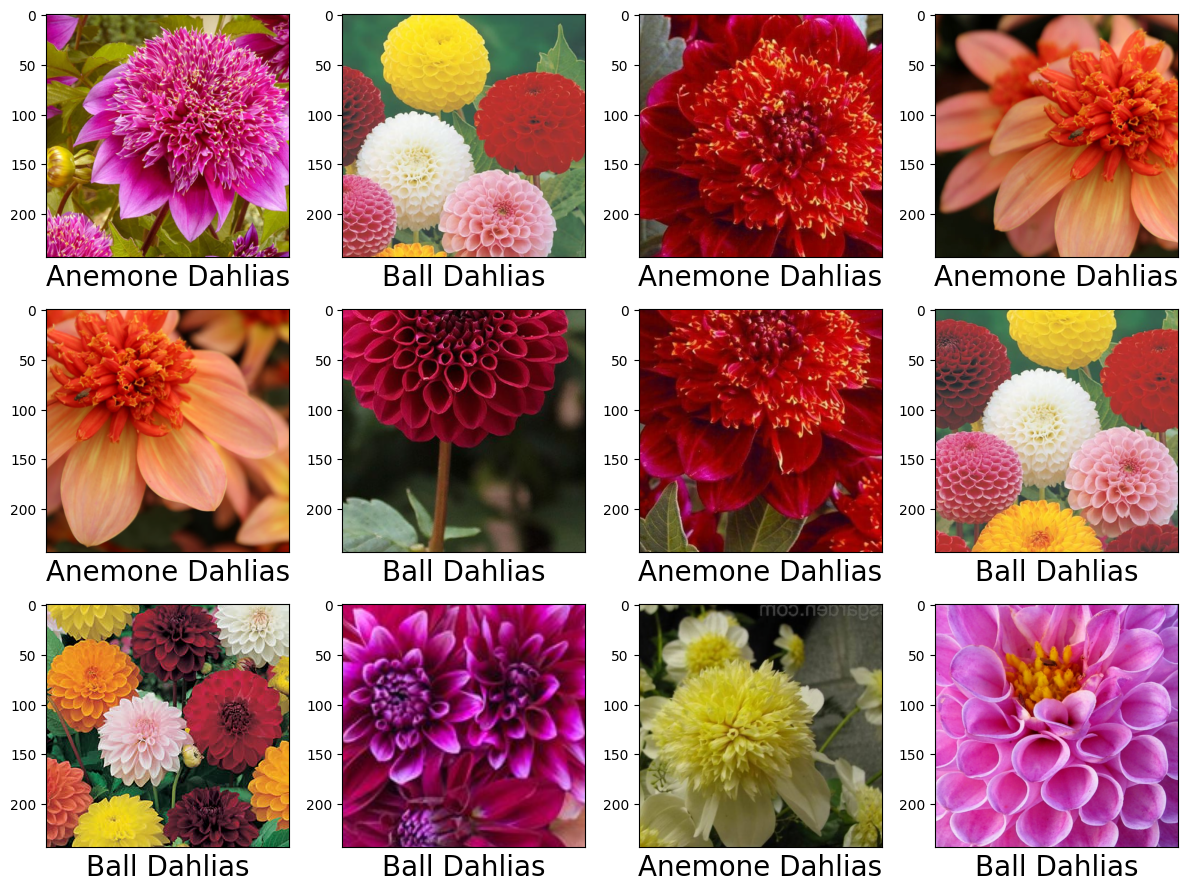

In [ ]:
images, classes = get_batches(dataloader['train'])
show_batches(images, classes)

2b.)

In [ ]:
import tensorflow as tf

image_size = (64, 64)
batch_size = 4

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(INPUT_DIR,"train"),
    validation_split=0.2,
    label_mode = "categorical",
    subset="training",
    seed=11,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(INPUT_DIR,"train"),
    validation_split=0.2,
    label_mode = "categorical",
    subset="validation",
    seed=11,
    image_size=image_size,
    batch_size=batch_size,
)

Found 168 files belonging to 2 classes.
Using 135 files for training.
Found 168 files belonging to 2 classes.
Using 33 files for validation.


In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, Resizing
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = tf.keras.Sequential([
    Rescaling(scale=1./255, input_shape=(64, 64, 3)),
    Resizing(64,64),
    ZeroPadding2D(padding=(80, 80)),
    Conv2D(96, (11, 11), strides=4, activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(2, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

Epoch 1/10
34/34 [==============================] - 61s 2s/step - loss: 0.8503 - accuracy: 0.4444 - val_loss: 0.6956 - val_accuracy: 0.4545
Epoch 2/10
34/34 [==============================] - 60s 2s/step - loss: 0.6940 - accuracy: 0.5111 - val_loss: 0.6949 - val_accuracy: 0.4545
Epoch 3/10
34/34 [==============================] - 59s 2s/step - loss: 0.6937 - accuracy: 0.5111 - val_loss: 0.6946 - val_accuracy: 0.4545
Epoch 4/10
34/34 [==============================] - 61s 2s/step - loss: 0.6938 - accuracy: 0.5111 - val_loss: 0.6941 - val_accuracy: 0.4545
Epoch 5/10
34/34 [==============================] - 59s 2s/step - loss: 0.6930 - accuracy: 0.5111 - val_loss: 0.6963 - val_accuracy: 0.4545
Epoch 6/10
34/34 [==============================] - 58s 2s/step - loss: 0.6941 - accuracy: 0.5111 - val_loss: 0.6944 - val_accuracy: 0.4545
Epoch 7/10
34/34 [==============================] - 58s 2s/step - loss: 0.6937 - accuracy: 0.5111 - val_loss: 0.6947 - val_accuracy: 0.4545
Epoch 8/10
34/34 [==

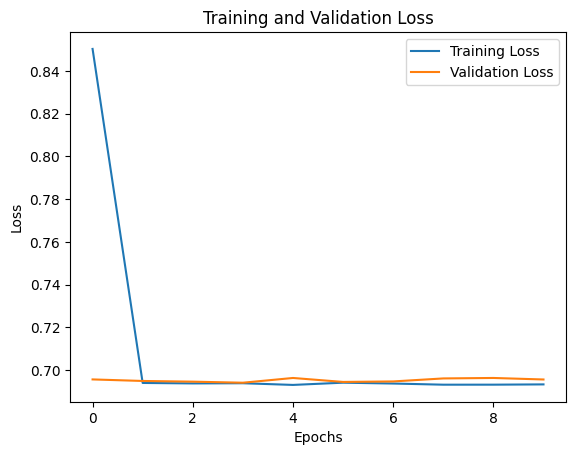

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

2c.)

In [ ]:
model_tune = tf.keras.Sequential([
    Rescaling(scale=1./255, input_shape=(64, 64, 3)),
    Resizing(64,64),
    ZeroPadding2D(padding=(80, 80)),
    Conv2D(96, (11, 11), strides=4, activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    BatchNormalization(),
    Dropout(.2),
    Dense(4096, activation='relu'),
    BatchNormalization(),
    Dropout(.2),
    Dense(2, activation='softmax'),
])

model_tune.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_tune = model_tune.fit(
    train_ds,
    epochs=7,
    validation_data=val_ds
)

Epoch 1/7
34/34 [==============================] - 61s 2s/step - loss: 3.1176 - accuracy: 0.4444 - val_loss: 22.4546 - val_accuracy: 0.4545
Epoch 2/7
34/34 [==============================] - 55s 2s/step - loss: 1.4126 - accuracy: 0.5185 - val_loss: 5.1689 - val_accuracy: 0.3636
Epoch 3/7
34/34 [==============================] - 55s 2s/step - loss: 1.2342 - accuracy: 0.5185 - val_loss: 2.5331 - val_accuracy: 0.3636
Epoch 4/7
34/34 [==============================] - 69s 2s/step - loss: 1.0726 - accuracy: 0.5852 - val_loss: 1.5988 - val_accuracy: 0.5758
Epoch 5/7
34/34 [==============================] - 58s 2s/step - loss: 0.9870 - accuracy: 0.5852 - val_loss: 7.7640 - val_accuracy: 0.4545
Epoch 6/7
34/34 [==============================] - 60s 2s/step - loss: 1.1421 - accuracy: 0.4667 - val_loss: 5.2187 - val_accuracy: 0.3939
Epoch 7/7
34/34 [==============================] - 58s 2s/step - loss: 1.1594 - accuracy: 0.5333 - val_loss: 1.1457 - val_accuracy: 0.5152


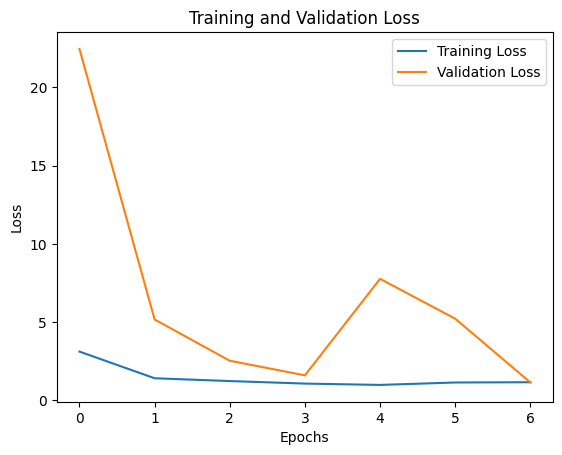

In [ ]:
plt.plot(history_tune.history['loss'], label='Training Loss')
plt.plot(history_tune.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

2d.)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

class1_folder = '/content/Data B/dataset/test/Anemone Dahlias'
class2_folder = '/content/Data B/dataset/test/Ball Dahlias'

test_folders = [(class1_folder, 0), (class2_folder, 1)]

predictions = []

for folder_path, class_label in test_folders:
    image_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith(('.jpg', '.png', '.jpeg'))]

    for image_file in image_files:
        test_image = load_img(image_file, target_size=(64, 64))
        test_image = img_to_array(test_image)
        test_image = test_image / 255.0
        test_image = np.expand_dims(test_image, axis=0)

        single_prediction = model.predict(test_image)
        predictions.append((single_prediction, class_label))

threshold = 0.5

class1_predictions = [1 if prediction[0][0] > threshold else 0 for prediction, label in predictions if label == 0]
class2_predictions = [1 if prediction[0][0] > threshold else 0 for prediction, label in predictions if label == 1]

class1_accuracy = class1_predictions.count(0) / len(class1_predictions) if len(class1_predictions) > 0 else 0
class2_accuracy = class2_predictions.count(1) / len(class2_predictions) if len(class2_predictions) > 0 else 0

print(f"Class 1 Accuracy: {class1_accuracy * 100:.2f}%")
print(f"Class 2 Accuracy: {class2_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 86ms/step
Class 1 Accuracy: 0.00%
Class 2 Accuracy: 100.00%


Transfer Learning






















































In [ ]:
def show_metrics(metrics):
    plt.figure(figsize=(12, 8))
    plt.plot(metrics['train'], label='train')
    plt.plot(metrics['val'], label='val')
    plt.grid()
    plt.legend()
    plt.show()

In [ ]:
def train_model(
    model: torch.nn.Module,
    criterion: torch.nn.Module,
    optimizer: torch.nn.Module,
    sheduler: torch.nn.Module,
    epochs: int = 25
) -> (torch.nn.Module, dict):
    r"""Training the model. Returns best model, dictionary of train and validation losses, dictionary of train and validation accuracies.
    Args:
        model (torch.nn.Module): Neural network
        criterion (torch.nn.Module): Cost function
        optimizer (torch.nn.Module): Optimization algorithm
        sheduler (torch.nn.Module): Learning rate change policy
        epochs (int): Number of training iterations. Default: 25
    """

    losses = {'train': [], 'val': []}
    accuracies = {'train': [], 'val': []}
    best_model_weights = model.state_dict()
    best_accuracy = 0.
    progress = tqdm(range(epochs), desc='Epoch:')

    for epoch in progress:
        for phase in ['train', 'val']:
            loss_accum = 0.
            corr_accum = 0
            model.train(mode=(phase == 'train'))

            for inputs, labels in tqdm(dataloader[phase], desc=f'Phase {phase}:'):
                inputs = inputs.to(DEVICE)
                labels = labels.to(DEVICE)

                if phase == 'train':
                    optimizer.zero_grad()
                    outp = model(inputs)
                    loss = criterion(outp, labels)
                    loss.backward()
                    optimizer.step()
                else:
                    with torch.no_grad():
                        outp = model(inputs)
                        loss = criterion(outp, labels)

                preds = torch.argmax(outp, -1)
                loss_accum += loss.item()
                corr_accum += (preds == labels.data).sum()

            if phase == 'train':
                sheduler.step()

            epoch_loss = loss_accum / dataset_size[phase]
            epoch_accuracy = corr_accum / dataset_size[phase]
            losses[phase].append(epoch_loss)
            accuracies[phase].append(epoch_accuracy)
            progress.set_description('loss: {:.4f}, acc: {:.4f}'.format(epoch_loss, epoch_accuracy))
            if phase == 'val' and epoch_accuracy > best_accuracy:
                best_accuracy = epoch_accuracy
                best_model_weights = model.state_dict()

    model.load_state_dict(best_model_weights)
    return model, losses, accuracies

In [ ]:
model = torchvision.models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 136MB/s]


In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
num_in_features = 9216
num_out_features = 2

model.classifier = torch.nn.Linear(num_in_features, num_out_features)
model.to(DEVICE)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
sheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
model, losses, accuracies = train_model(model, loss, optimizer, sheduler)

Epoch::   0%|          | 0/25 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

Phase train::   0%|          | 0/42 [00:00<?, ?it/s]

Phase val::   0%|          | 0/10 [00:00<?, ?it/s]

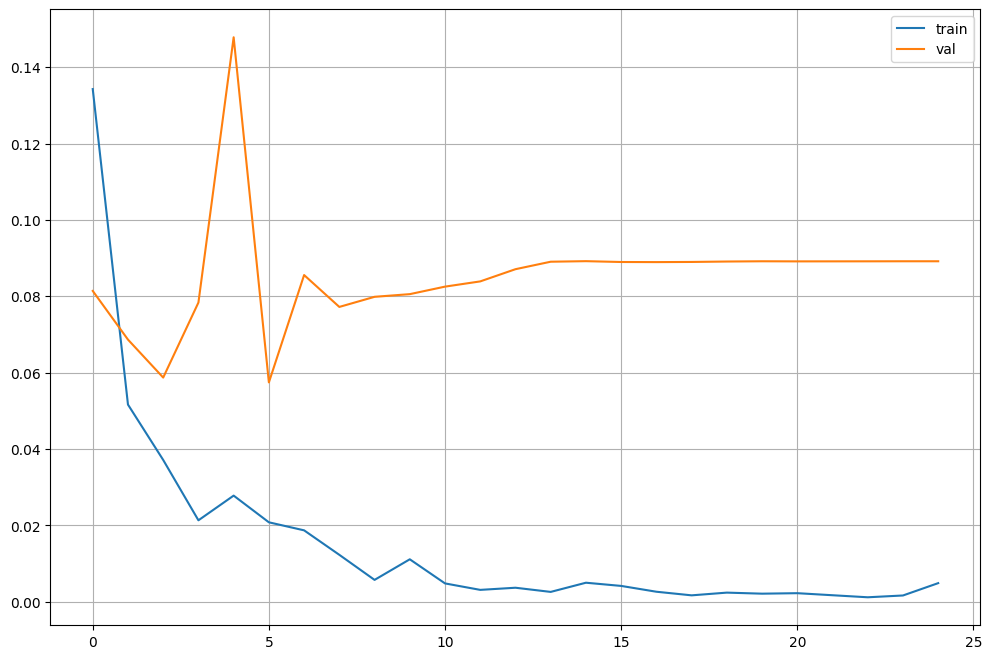

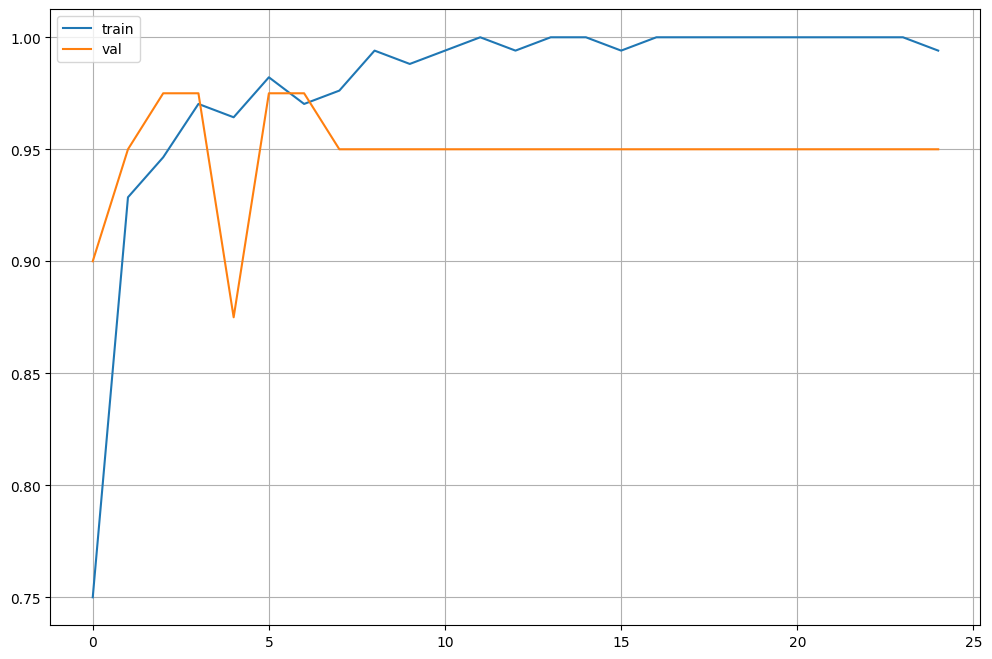

tensor(0.9750)


In [ ]:
show_metrics(losses)
show_metrics(accuracies)
print(max(accuracies['val']))